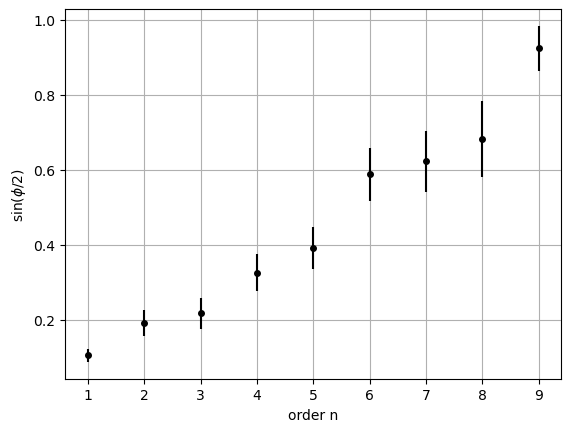

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

n = np.linspace(1,9,9)
phi = np.array([12, 22, 25, 38, 46, 72, 77, 86, 135])
unc = np.array([2, 4, 5, 6, 7, 10, 12, 16, 18])

# error propagation: dsin(phi/2) / dphi = 0.5 * cos(phi/2)
uncprop = 0.5*(np.cos((phi/2.0)*(2*math.pi/360))*unc*2*math.pi/360)

plt.errorbar(n, np.sin((phi/2.0)*(2*math.pi/360)), yerr=uncprop, fmt='.', color='black', markersize=8) #take care: the np.sin ufunc takes angles in rad, not degrees!
plt.xlabel('order n')
plt.ylabel('$\sin(\phi/2)$')
plt.grid()

In [4]:
lam = 0.0711

def linfunc(x, k, d):
    return k*x + d

fit = np.polyfit(n, np.sin((phi/2.0)*(2*math.pi/360)), 1, full=False, cov=True, w=uncprop)
fit[1][0,0]

9.464604398609839e-05

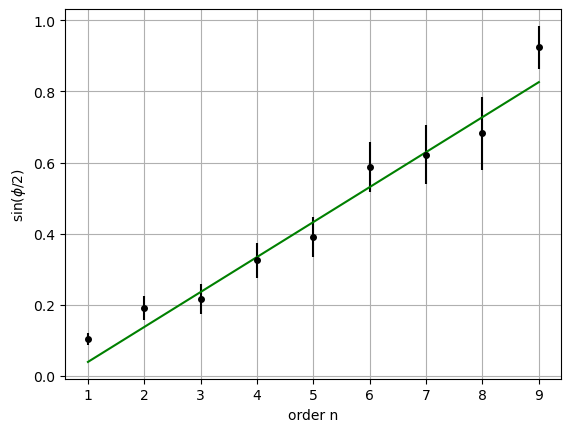

In [5]:
plt.errorbar(n, np.sin((phi/2.0)*(2*math.pi/360)), yerr=uncprop, fmt='.', color='black', markersize=8) #take care: the np.sin ufunc takes angles in rad, not degrees!
plt.plot(n, linfunc(n, fit[0][0], fit[0][1]), color='green') 
plt.xlabel('order n')
plt.ylabel('$\sin(\phi/2)$')
plt.grid()

In [6]:
# plane spacing can be inferred from the slope!

d = lam*10**-9 / (2*fit[0][0])
dd = np.sqrt(fit[1][0,0]) * lam*10**-9 / (2*fit[0][0]**2) # error propagation again. need first entry of covariance matrix (is variance of k)

print('plane spacing d = ', round(d*10**9, 4), ' +- ', round(dd*10**9, 4), ' nm')

plane spacing d =  0.3617  +-  0.0358  nm
